In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# True equiation function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

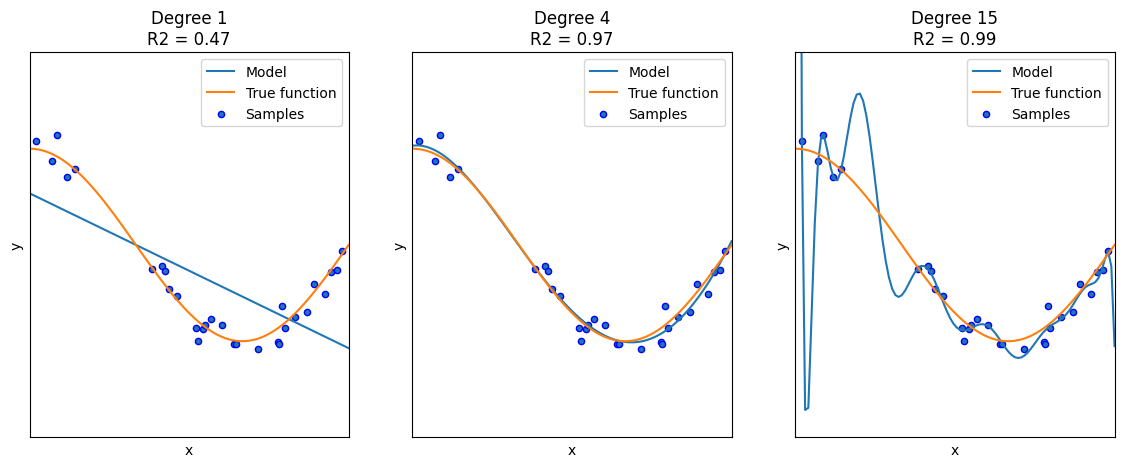

In [ ]:
# Set a seed for random number generation to ensure reproducibility.
np.random.seed(0)

# Define the number of data samples and polynomial degrees to be used.
n_samples = 30
degrees = [1, 4, 15]

# Generate random data points (X) and add random noise to create the target values (y).
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Create a plot with subplots for different polynomial degrees.
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Create polynomial features and linear regression models for each degree.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()

    # Create a pipeline to sequentially apply polynomial features and linear regression.
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )

    # Fit the pipeline to the data (X) and target (y).
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross-validation.
    score = pipeline.score(X[:, np.newaxis], y)

    # Generate test data and plot the model's predictions, true function, and samples.
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]}\nR2 = {score:.2f}")

plt.show()

# Lasso and Ridge

In [ ]:
from sklearn.linear_model import Lasso, Ridge

## Lasso (L1)

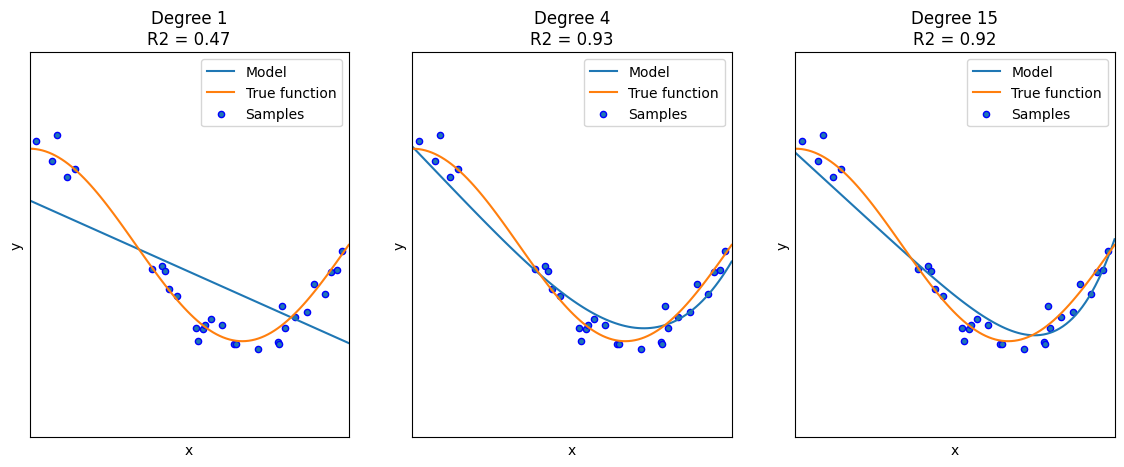

In [ ]:
# Set a seed for random number generation to ensure reproducibility.
np.random.seed(0)

# Define the number of data samples and polynomial degrees to be used.
n_samples = 30
degrees = [1, 4, 15]

# Generate random data points (X) and add random noise to create the target values (y).
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Create a plot with subplots for different polynomial degrees.
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Create polynomial features for each degree and set Lasso regression with alpha.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    alpha_lasso = 0.01
    lasso_model = Lasso(alpha=alpha_lasso)

    # Transform data with polynomial features and fit the Lasso model.
    X_poly = polynomial_features.fit_transform(X[:, np.newaxis])
    lasso_model.fit(X_poly, y)

    # Evaluate the Lasso model using the R-squared (R2) score.
    score = lasso_model.score(X_poly, y)

    # Generate test data and plot the Lasso model's predictions, true function, and samples.
    X_test = np.linspace(0, 1, 100)
    X_test_poly = polynomial_features.transform(X_test[:, np.newaxis])
    plt.plot(X_test, lasso_model.predict(X_test_poly), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]}\nR2 = {score:.2f}")

plt.show()

## Ridge (L2)

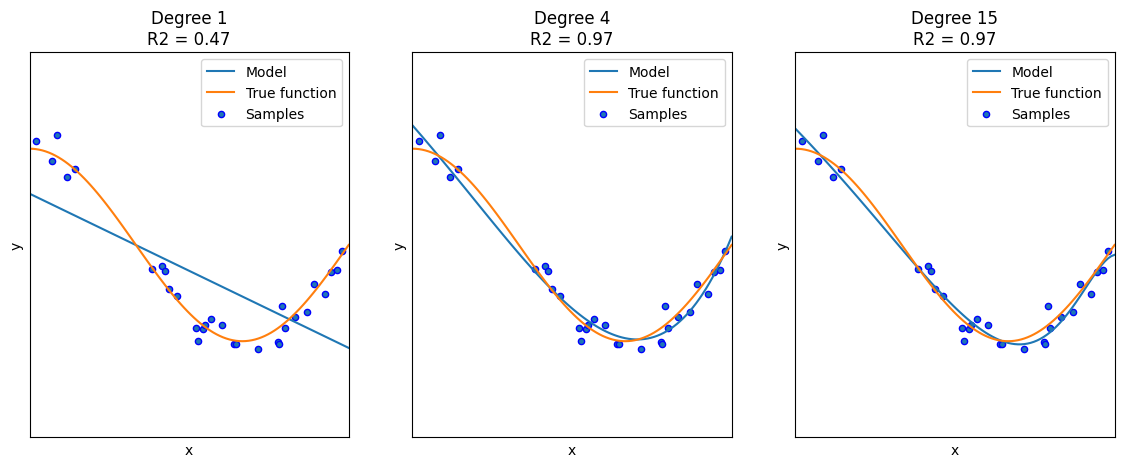

In [ ]:
# Set a seed for random number generation to ensure reproducibility.
np.random.seed(0)

# Define the number of data samples and polynomial degrees to be used.
n_samples = 30
degrees = [1, 4, 15]

# Generate random data points (X) and add random noise to create the target values (y).
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Create a plot with subplots for different polynomial degrees.
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Create polynomial features for each degree and set ridge regression with alpha.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    alpha_ridge = 0.01
    ridge_model = Ridge(alpha=alpha_ridge)

    # Transform data with polynomial features and fit the ridge model.
    X_poly = polynomial_features.fit_transform(X[:, np.newaxis])
    ridge_model.fit(X_poly, y)

    # Evaluate the Ridge model using the R-squared (R2) score.
    score = ridge_model.score(X_poly, y)

    # Generate test data and plot the ridge model's predictions, true function, and samples.
    X_test = np.linspace(0, 1, 100)
    X_test_poly = polynomial_features.transform(X_test[:, np.newaxis])
    plt.plot(X_test, ridge_model.predict(X_test_poly), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]}\nR2 = {score:.2f}")

plt.show()


In [38]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset as an example
iris = load_iris()
X, y = iris.data, iris.target

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:")
for i, score in enumerate(cross_val_scores):
  print(f"Fold {i} | Score: {score:.2f}")

# Calculate the mean and standard deviation of the scores
mean_score = np.mean(cross_val_scores)
std_score = np.std(cross_val_scores)

print(f"Mean Score: {mean_score:.2f}")
print(f"Standard Deviation: {std_score:.2f}")


Cross-Validation Scores:
Fold 0 | Score: 0.97
Fold 1 | Score: 0.97
Fold 2 | Score: 0.93
Fold 3 | Score: 0.97
Fold 4 | Score: 1.00
Mean Score: 0.97
Standard Deviation: 0.02


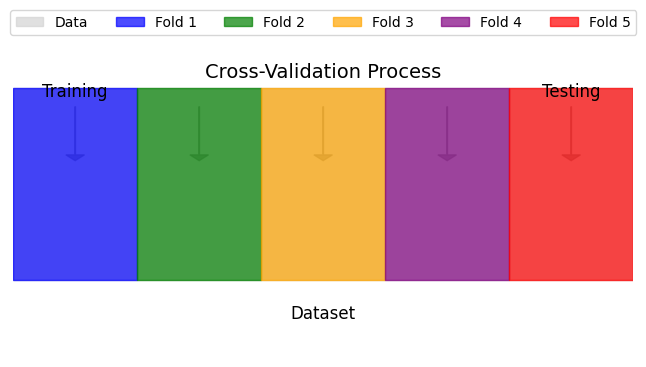

In [34]:
import matplotlib.pyplot as plt

# Create a diagram to visualize the cross-validation process
fig, ax = plt.subplots(figsize=(8, 4))

# Draw rectangles representing the data
data_rect = plt.Rectangle((0, 0), 1, 1, color='lightgray', alpha=0.7, label='Data')

# Draw smaller rectangles representing each fold
fold_rects = []
num_folds = 5  # Number of cross-validation folds
fold_colors = ['blue', 'green', 'orange', 'purple', 'red']

for i in range(num_folds):
    fold_rect = plt.Rectangle((i / num_folds, 0), 1 / num_folds, 1, color=fold_colors[i], alpha=0.7, label=f'Fold {i + 1}')
    fold_rects.append(fold_rect)

# Draw arrows to represent the training and testing process
for i in range(num_folds):
    ax.arrow((i + 0.5) / num_folds, 0.9, 0, -0.25, head_width=0.03, head_length=0.03, fc='black', ec='black', alpha=0.7)

# Add labels and legends
ax.text(0.5, 1.05, 'Cross-Validation Process', fontsize=14, ha='center')
ax.text(0.5, -0.2, 'Dataset', fontsize=12, ha='center')
ax.text(0.1, 0.95, 'Training', fontsize=12, ha='center', color='black')
ax.text(0.9, 0.95, 'Testing', fontsize=12, ha='center', color='black')

ax.add_patch(data_rect)
for fold_rect in fold_rects:
    ax.add_patch(fold_rect)

# Set axis properties
ax.set_xlim(0, 1)
ax.set_ylim(-0.4, 1.2)
ax.axis('off')

# Add legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=num_folds + 1)

# Show the diagram
plt.show()


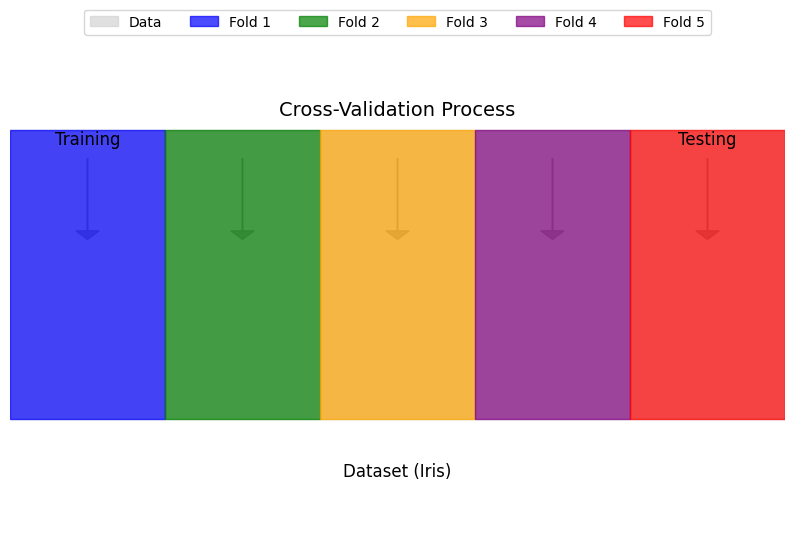

Cross-Validation Scores:
[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Score: 0.97
Standard Deviation: 0.02


In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset as an example
iris = load_iris()
X, y = iris.data, iris.target

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Create a diagram to visualize the cross-validation process
fig, ax = plt.subplots(figsize=(10, 6))

# Draw rectangles representing the data
data_rect = plt.Rectangle((0, 0), 1, 1, color='lightgray', alpha=0.7, label='Data')

# Draw smaller rectangles representing each fold
fold_rects = []
num_folds = 5  # Number of cross-validation folds
fold_colors = ['blue', 'green', 'orange', 'purple', 'red']

for i in range(num_folds):
    fold_rect = plt.Rectangle((i / num_folds, 0), 1 / num_folds, 1, color=fold_colors[i], alpha=0.7, label=f'Fold {i + 1}')
    fold_rects.append(fold_rect)

# Draw arrows to represent the training and testing process
for i in range(num_folds):
    ax.arrow((i + 0.5) / num_folds, 0.9, 0, -0.25, head_width=0.03, head_length=0.03, fc='black', ec='black', alpha=0.7)

# Add labels and legends
ax.text(0.5, 1.05, 'Cross-Validation Process', fontsize=14, ha='center')
ax.text(0.5, -0.2, 'Dataset (Iris)', fontsize=12, ha='center')
ax.text(0.1, 0.95, 'Training', fontsize=12, ha='center', color='black')
ax.text(0.9, 0.95, 'Testing', fontsize=12, ha='center', color='black')

ax.add_patch(data_rect)
for fold_rect in fold_rects:
    ax.add_patch(fold_rect)

# Set axis properties
ax.set_xlim(0, 1)
ax.set_ylim(-0.4, 1.2)
ax.axis('off')

# Add legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=num_folds + 1)

# Show the diagram
plt.show()

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cross_val_scores)

# Calculate the mean and standard deviation of the scores
mean_score = np.mean(cross_val_scores)
std_score = np.std(cross_val_scores)

print(f"Mean Score: {mean_score:.2f}")
print(f"Standard Deviation: {std_score:.2f}")


In [51]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset as an example
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Linear Regression (no hyperparameters to tune)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_predictions = lin_reg.predict(X_test)

# Hyperparameter tuning for Ridge regression
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=10)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
best_ridge.fit(X_train, y_train)
ridge_predictions = best_ridge.predict(X_test)

# Hyperparameter tuning for Lasso regression
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=10)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
best_lasso.fit(X_train, y_train)
lasso_predictions = best_lasso.predict(X_test)

# Evaluate the models
lin_reg_mse = mean_squared_error(y_test, lin_reg_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

lin_reg_r2 = r2_score(y_test, lin_reg_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Linear Regression - Mean Squared Error: {:.2f}".format(lin_reg_mse))
print("Linear Regression - R-squared (R2): {:.2f}".format(lin_reg_r2))
print("\nRidge Regression - Mean Squared Error: {:.2f}".format(ridge_mse))
print("Ridge Regression - R-squared (R2): {:.2f}".format(ridge_r2))
print("\nLasso Regression - Mean Squared Error: {:.2f}".format(lasso_mse))
print("Lasso Regression - R-squared (R2): {:.2f}".format(lasso_r2))

# Linear Regression with default parameters
lin_reg_default = LinearRegression()
lin_reg_default.fit(X_train, y_train)
lin_reg_default_predictions = lin_reg_default.predict(X_test)

lin_reg_default_mse = mean_squared_error(y_test, lin_reg_default_predictions)
lin_reg_default_r2 = r2_score(y_test, lin_reg_default_predictions)

print("\nLinear Regression (Default) - Mean Squared Error: {:.2f}".format(lin_reg_default_mse))
print("Linear Regression (Default) - R-squared (R2): {:.2f}".format(lin_reg_default_r2))

# Ridge Regression with default parameters
ridge_default = Ridge()
ridge_default.fit(X_train, y_train)
ridge_default_predictions = ridge_default.predict(X_test)

ridge_default_mse = mean_squared_error(y_test, ridge_default_predictions)
ridge_default_r2 = r2_score(y_test, ridge_default_predictions)

print("\nRidge Regression (Default) - Mean Squared Error: {:.2f}".format(ridge_default_mse))
print("Ridge Regression (Default) - R-squared (R2): {:.2f}".format(ridge_default_r2))

# Lasso Regression with default parameters
lasso_default = Lasso()
lasso_default.fit(X_train, y_train)
lasso_default_predictions = lasso_default.predict(X_test)

lasso_default_mse = mean_squared_error(y_test, lasso_default_predictions)
lasso_default_r2 = r2_score(y_test, lasso_default_predictions)

print("\nLasso Regression (Default) - Mean Squared Error: {:.2f}".format(lasso_default_mse))
print("Lasso Regression (Default) - R-squared (R2): {:.2f}".format(lasso_default_r2))


Linear Regression - Mean Squared Error: 2900.19
Linear Regression - R-squared (R2): 0.45

Ridge Regression - Mean Squared Error: 2856.49
Ridge Regression - R-squared (R2): 0.46

Lasso Regression - Mean Squared Error: 2798.19
Lasso Regression - R-squared (R2): 0.47

Linear Regression (Default) - Mean Squared Error: 2900.19
Linear Regression (Default) - R-squared (R2): 0.45

Ridge Regression (Default) - Mean Squared Error: 3077.42
Ridge Regression (Default) - R-squared (R2): 0.42

Lasso Regression (Default) - Mean Squared Error: 3403.58
Lasso Regression (Default) - R-squared (R2): 0.36


In [41]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28